#Table of Contents
* [1. Web Scraping](#1.-Web-Scraping)
* [2. Checking data](#2.-Checking-data)

In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
import json
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import random
import json
import statsmodels.graphics.tsaplots as tsaplots
import pymc as pm

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# from pyquery import PyQuery as pq
from bs4 import BeautifulSoup
# The "requests" library makes working with HTTP requests easier
# than the built-in urllib libraries.
import requests
from datetime import datetime
from dateutil import parser
from collections import Counter
from itertools import groupby

# 1. Web Scraping

In [32]:
rotten = 0
fresh = 0

results_critics = []

#First, I need to get the number of pages of reviews
page=requests.get("http://www.rottentomatoes.com/m/batman_v_superman_dawn_of_justice/reviews/")
soup = BeautifulSoup(page.text, "html.parser")
number_of_pages = soup.find("span", attrs={"class":"pageInfo"}).get_text().split()[-1]
print number_of_pages

#run through the number of critics pages
for x in range(int(number_of_pages)):
    page=requests.get("http://www.rottentomatoes.com/m/batman_v_superman_dawn_of_justice/reviews/?page="+str(x+1)+"&sort=")
    soup = BeautifulSoup(page.text, "html.parser")
    

    page_reviews = soup.find("div", attrs={"class":"review_table"}).find_all("div", attrs={"class":"row review_table_row"})
    for review in page_reviews:
        bool_rotten = 0
        
        #Check if the review is rotten or fresh
        review_rotten = review.find_all("div", attrs ={"class":"review_icon icon small rotten"})
        if (len(review_rotten) is 0):
            fresh+=1
            bool_rotten = 1
        else:
            rotten+=1

        review_date = review.find("div", attrs ={"class":"review_date subtle small"}).get_text() 
        dt = parser.parse(review_date).date()  #convert it into python datetime format
        #print dt, type(dt)

        results_critics.append((dt, bool_rotten ))

    #pause for a while
    time.sleep(1)

print rotten
print fresh
    


17
233
89


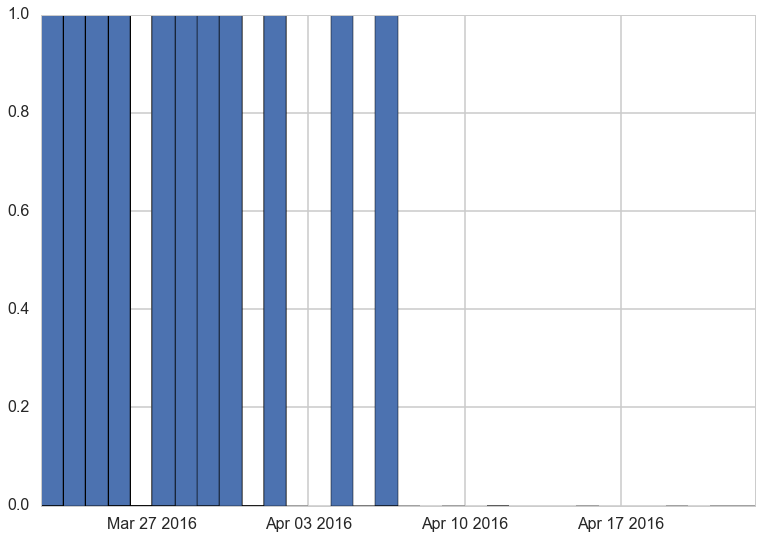

In [7]:
x = [date for date,time in results_critics ]
y = [time for date,time in results_critics ]

ax = plt.subplot(111)
ax.bar(x, y, width=1)
ax.xaxis_date()

plt.show()

In [8]:
critics_grouped = []
for date, review_list in groupby(results_critics, lambda x: x[0]):
    review = [data[1] for data in review_list]
    review_count = Counter(review)
    critics_grouped.append((date, dict(review_count))) 
    
print critics_grouped


[(datetime.date(2016, 4, 22), {0: 1}), (datetime.date(2016, 4, 21), {0: 1}), (datetime.date(2016, 4, 19), {0: 1}), (datetime.date(2016, 4, 15), {0: 1}), (datetime.date(2016, 4, 11), {0: 3}), (datetime.date(2016, 4, 9), {0: 1}), (datetime.date(2016, 4, 7), {0: 1}), (datetime.date(2016, 4, 6), {0: 3, 1: 1}), (datetime.date(2016, 4, 5), {0: 2}), (datetime.date(2016, 4, 4), {0: 1, 1: 1}), (datetime.date(2016, 4, 2), {0: 1}), (datetime.date(2016, 4, 1), {0: 5, 1: 3}), (datetime.date(2016, 3, 31), {0: 7}), (datetime.date(2016, 3, 30), {1: 3}), (datetime.date(2016, 3, 29), {0: 3, 1: 2}), (datetime.date(2016, 3, 28), {0: 10, 1: 1}), (datetime.date(2016, 3, 27), {0: 9, 1: 3}), (datetime.date(2016, 3, 26), {0: 9}), (datetime.date(2016, 3, 25), {0: 33, 1: 13}), (datetime.date(2016, 3, 24), {0: 46, 1: 16}), (datetime.date(2016, 3, 23), {0: 56, 1: 26}), (datetime.date(2016, 3, 22), {0: 39, 1: 20})]


### Scraping User reviews

In [8]:
results_users = []

#First, I need to get the number of pages of reviews
# page=requests.get("http://www.rottentomatoes.com/m/batman_v_superman_dawn_of_justice/reviews/?type=user")
page=requests.get("http://www.rottentomatoes.com/m/spectre_2015/reviews/?type=user")

soup = BeautifulSoup(page.text, "html.parser")
number_of_pages = soup.find("span", attrs={"class":"pageInfo"}).get_text().split()[-1]

#run through the number of user pages
for x in range(int(number_of_pages)):
    try:
#         page=requests.get("http://www.rottentomatoes.com/m/batman_v_superman_dawn_of_justice/reviews/?page="+str(x+1)+"&type=user&sort=")
        page=requests.get("http://www.rottentomatoes.com/m/spectre_2015/reviews/?page="+str(x+1)+"&type=user&sort=")
        soup = BeautifulSoup(page.text, "html.parser")

        page_reviews = soup.find("div", attrs={"class":"review_table"}).find_all("div", attrs={"class":"row review_table_row"})
        for review in page_reviews:

            #Check get the number of stars
            stars = review.find_all("span", attrs ={"class":"glyphicon glyphicon-star"})


            review_date = review.find("span", attrs ={"class":"fr small subtle"}).get_text() 
            dt = parser.parse(review_date).date()  #convert it into python datetime format
            results_users.append((dt, len(stars) ))
            
    #rotten tomatoes does not show all the user ratings. after a certain point, it stops
    except Exception as e:
        print "Breaking at page:", x+1
        break

    #pause for a while
    time.sleep(1)



Breaking at page: 53


In [9]:
print len(results_users)

1023


In [10]:
results_users.sort()
data_users = {}
for data in results_users:
    if data[0].month < 10:
        month = '0'+str(data[0].month)
    else:
        month = str(data[0].month)
    if data[0].day < 10:
        day = '0'+str(data[0].day)
    else:
        day = str(data[0].day)
    key = str(data[0].year)+month+day
    if key not in data_users.keys():
        data_users[key] = data[1]
    else:
        data_users[key] = np.hstack((data_users[key], data[1]))

In [28]:
min_num = 2
rating_avg = {}
for i in data_users:
    if type(data_users[i]) is not int and len(data_users[i]) >= min_num:
        rating_avg[i] = np.mean(data_users[i])

### Questions: how to deal with the gaps in the time series? Group the ratings by week or stick with per day?

There is quite a big uncertainty in the ACF and PACF.

In [29]:
rating_avg

{'20141220': 3.5,
 '20141227': 3.0,
 '20150213': 3.5,
 '20150331': 3.5,
 '20150723': 3.0,
 '20150808': 4.0,
 '20150818': 2.0,
 '20150906': 2.5,
 '20151024': 2.6666666666666665,
 '20151026': 3.25,
 '20151027': 3.5,
 '20151028': 2.5,
 '20151029': 3.5,
 '20151030': 3.5,
 '20151031': 2.75,
 '20151102': 3.5,
 '20151104': 3.0,
 '20151105': 3.0,
 '20151106': 3.5714285714285716,
 '20151107': 3.7142857142857144,
 '20151108': 2.75,
 '20151109': 3.5,
 '20151110': 3.3333333333333335,
 '20151111': 3.1666666666666665,
 '20151113': 3.25,
 '20151114': 3.6666666666666665,
 '20151116': 2.0,
 '20151117': 3.0,
 '20151118': 2.3333333333333335,
 '20151119': 3.3333333333333335,
 '20151120': 3.4444444444444446,
 '20151121': 3.04,
 '20151122': 2.4166666666666665,
 '20151123': 2.8333333333333335,
 '20151124': 2.6000000000000001,
 '20151125': 3.5333333333333332,
 '20151126': 2.8500000000000001,
 '20151127': 2.263157894736842,
 '20151128': 3.1578947368421053,
 '20151129': 2.8421052631578947,
 '20151130': 3.5,
 '2

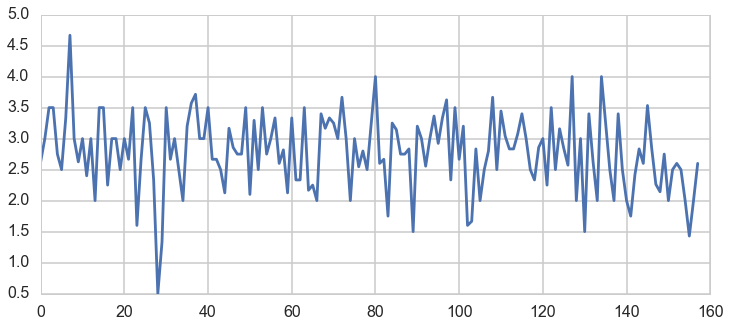

In [30]:
plt.figure(figsize=[12,5])
plt.plot(rating_avg.values())

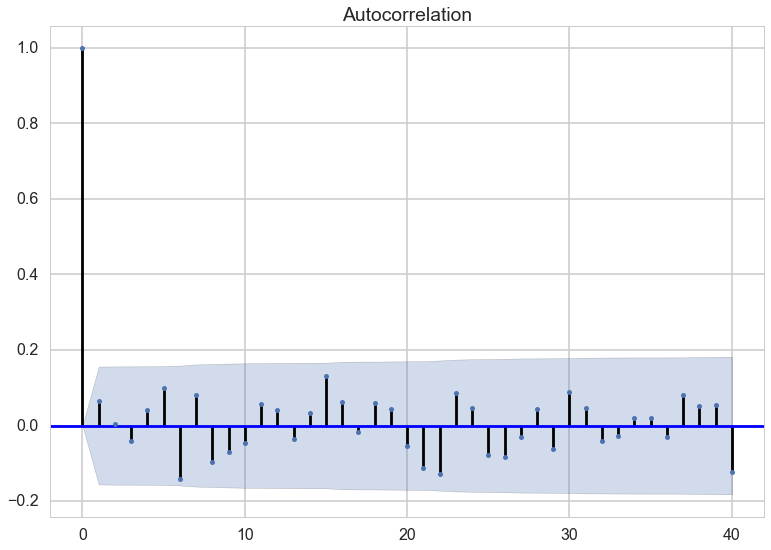

In [31]:
tsaplots.plot_acf(rating_avg.values(), lags=40);

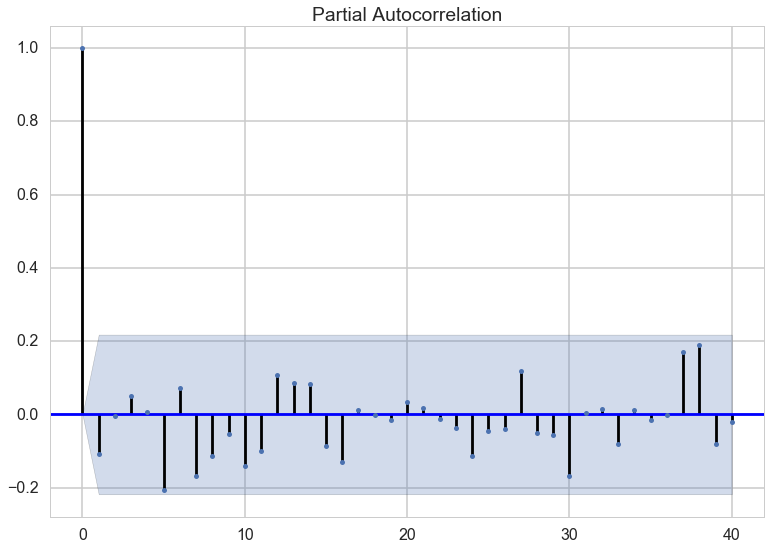

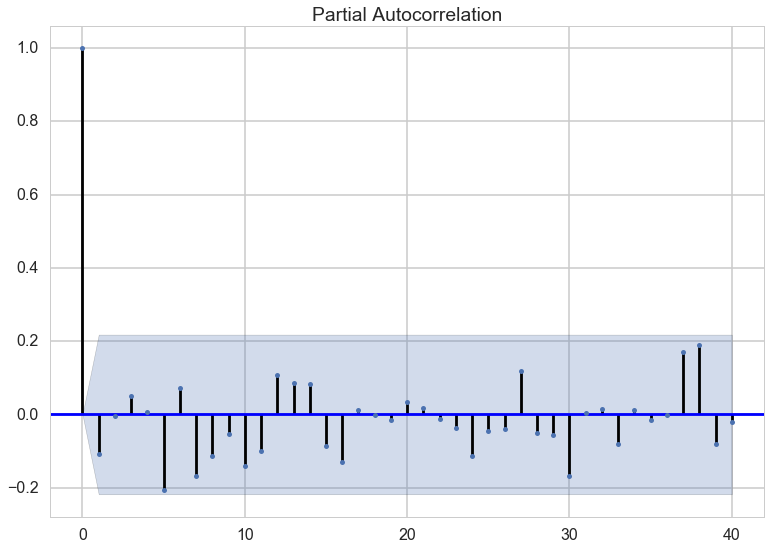

In [20]:
tsaplots.plot_pacf(rating_avg.values(), lags=40)

### Modelling the data as an AR(1)

In [24]:
alpha = pm.Uniform('alpha',0.0,5.0) 
sigma2 = pm.Uniform('sigma2',0.0,1.0)

# create the likelihood
@pm.observed
def get_likelihood(value=rating_avg.values(), alpha=alpha, var=sigma2):
    likelihood = 0
    for i in range(1,len(value)):
        likelihood += pm.normal_like(value[i],alpha*value[i-1],1.0/var) # this is for p(x_n|x_{n-1})
            
    return likelihood

model_timeseries=pm.Model([alpha, sigma2, get_likelihood])
mcmc_timeseries = pm.MCMC(model_timeseries)
mcmc_timeseries.sample(iter=20000, burn=2000,thin=5)

 [-----------------100%-----------------] 20000 of 20000 complete in 27.9 sec

Plotting alpha


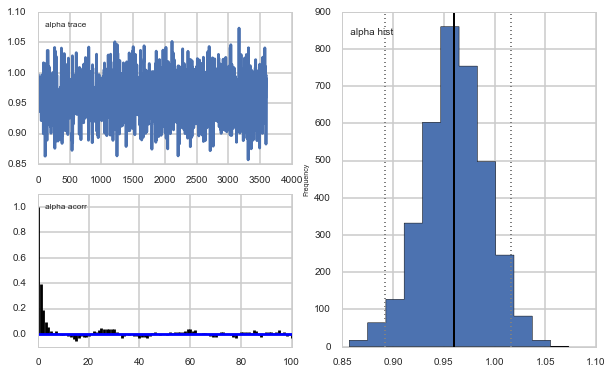

In [26]:
pm.Matplot.plot(alpha)

Plotting sigma2


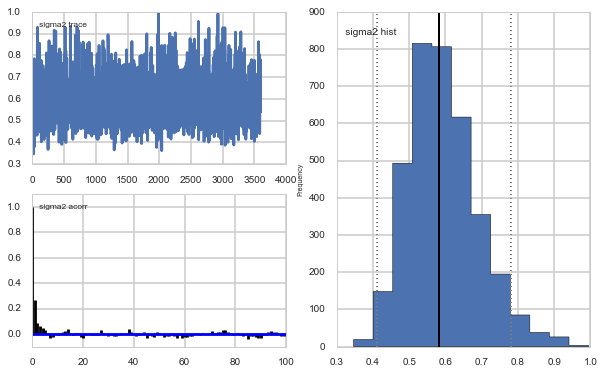

In [27]:
pm.Matplot.plot(sigma2)

In [42]:
print Counter(elem[0] for elem in results_users)
print Counter(elem[1] for elem in results_users)

Counter({datetime.date(2016, 4, 9): 99, datetime.date(2016, 4, 11): 72, datetime.date(2016, 4, 8): 69, datetime.date(2016, 4, 12): 61, datetime.date(2016, 4, 10): 60, datetime.date(2016, 4, 13): 54, datetime.date(2016, 4, 14): 48, datetime.date(2016, 4, 15): 47, datetime.date(2016, 4, 17): 42, datetime.date(2016, 4, 18): 40, datetime.date(2016, 4, 16): 35, datetime.date(2016, 4, 19): 32, datetime.date(2016, 3, 26): 30, datetime.date(2016, 3, 25): 26, datetime.date(2016, 3, 23): 22, datetime.date(2016, 4, 21): 21, datetime.date(2016, 4, 20): 21, datetime.date(2016, 3, 28): 21, datetime.date(2016, 4, 22): 20, datetime.date(2016, 3, 27): 20, datetime.date(2016, 3, 22): 20, datetime.date(2016, 3, 24): 15, datetime.date(2016, 4, 23): 14, datetime.date(2016, 4, 4): 13, datetime.date(2016, 3, 31): 7, datetime.date(2016, 4, 7): 7, datetime.date(2016, 3, 29): 7, datetime.date(2016, 3, 21): 6, datetime.date(2016, 4, 2): 5, datetime.date(2016, 3, 30): 5, datetime.date(2016, 4, 1): 4, datetime.dat

### Scraping Box Office Sales

In [130]:
results_box_office = []
page=requests.get("http://www.boxofficemojo.com/movies/?page=daily&view=chart&id=superman2015.htm")
soup = BeautifulSoup(page.text, "html.parser")
tables = soup.find("table", attrs={"class":"chart-wide"})

rows = tables.find_all("tr", attrs={"bgcolor":"#ffffff"}) + tables.find_all("tr", attrs={"bgcolor":"#f4f4ff"})
for row in rows:
    row_splitted = row.find_all("td")
    date = parser.parse(row_splitted[1].get_text()).date()  #1 correspond to date information
    gross = int(row_splitted[3].get_text()[1:].replace(',', ''))
    results_box_office.append((date, gross))
    
results_box_office.sort()
print results_box_office

[(datetime.date(2016, 3, 25), 81558505), (datetime.date(2016, 3, 26), 50657088), (datetime.date(2016, 3, 27), 33791754), (datetime.date(2016, 3, 28), 15040496), (datetime.date(2016, 3, 29), 12180163), (datetime.date(2016, 3, 30), 8102420), (datetime.date(2016, 3, 31), 7742367), (datetime.date(2016, 4, 1), 15014297), (datetime.date(2016, 4, 2), 22334278), (datetime.date(2016, 4, 3), 13986679), (datetime.date(2016, 4, 4), 3192415), (datetime.date(2016, 4, 5), 4088296), (datetime.date(2016, 4, 6), 2840624), (datetime.date(2016, 4, 7), 2721160), (datetime.date(2016, 4, 8), 6071601), (datetime.date(2016, 4, 9), 10660730), (datetime.date(2016, 4, 10), 6630748), (datetime.date(2016, 4, 11), 1474602), (datetime.date(2016, 4, 12), 1867311), (datetime.date(2016, 4, 13), 1245754), (datetime.date(2016, 4, 14), 1100442), (datetime.date(2016, 4, 15), 2425772), (datetime.date(2016, 4, 16), 4082077), (datetime.date(2016, 4, 17), 2520507)]


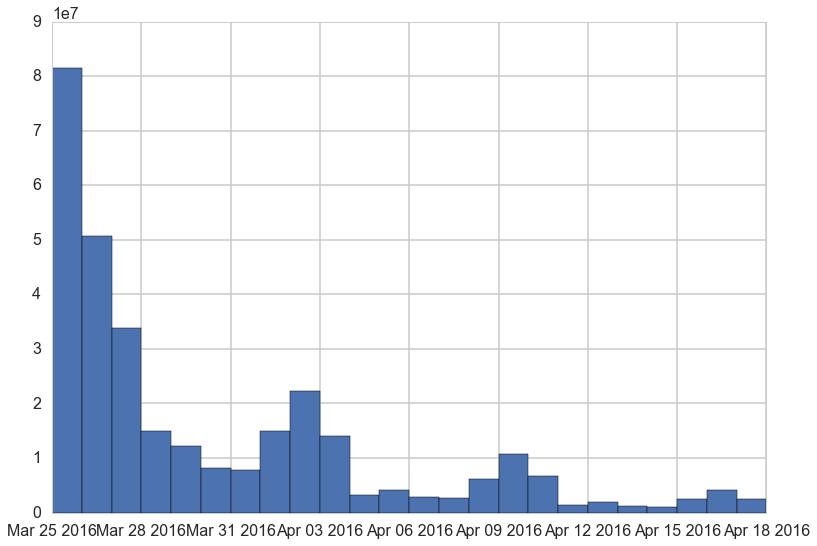

In [182]:
x = [date for date,gross in results_box_office ]
y = [gross for date,gross in results_box_office ]

ax = plt.subplot(111)
ax.bar(x, y, width=1)
ax.xaxis_date()

plt.show()

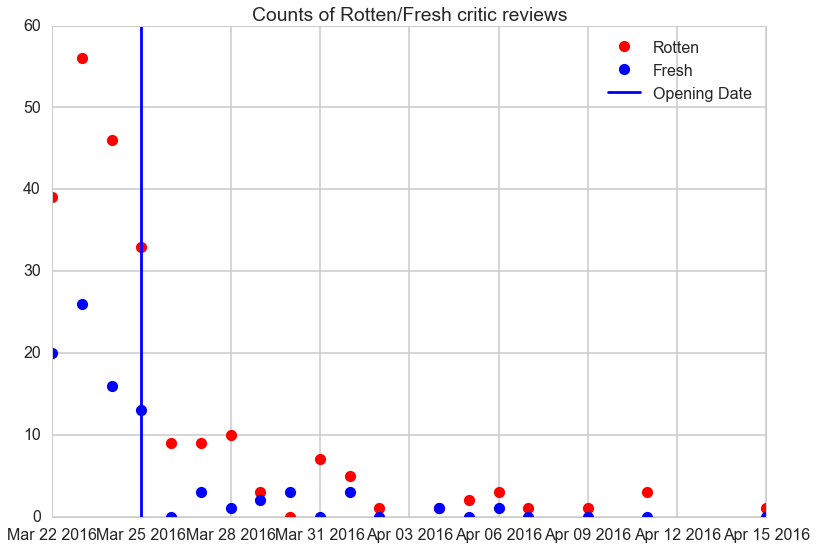

In [189]:
opening_date = results_box_office[0][0]
x = [date for date,review in critics_grouped ]
rotten = []
for date,review in critics_grouped:
    if 0 in review.keys():
        rotten.append(review[0])
    else:
        rotten.append(0)
        
fresh = []
for date,review in critics_grouped:
    if 1 in review.keys():
        fresh.append(review[1])
    else:
        fresh.append(0)

plt.plot(x, rotten, "ro", label = 'Rotten')
plt.plot(x, fresh, "bo", label = 'Fresh')
plt.axvline(opening_date, label = 'Opening Date')
plt.legend()
plt.title("Counts of Rotten/Fresh critic reviews")